M32, a compact elliptical (cE) satellite galaxy of the Andromeda Galaxy (M31), presents a rare and valuable opportunity to resolve individual stars due to its proximity. However, the origin of M32 remains an open question: was it formed as an intrinsically compact elliptical galaxy, or is it the remnant core of a more massive progenitor shaped by tidal stripping from M31? (Note: Ivanna's research support this hypothesis! Kinematical characteristic discrepancy at R_iso) Both scenarios are supported by distinct lines of evidence, yet neither has been conclusively confirmed.

In this study, we aim to shed light on the formation history of M32 by analyzing the kinematical properties of **serendipitous stellar sources**—stars that were incidentally captured in spectroscopic slits intended for nearby targets. Using Keck/DEIMOS spectroscopic data from the southern extension of the SPLASH (Spectroscopic and Photometric Landscape of Andromeda’s Stellar Halo) survey, in combination with optical imaging from the PHAST (Panchromatic Hubble Andromeda Southern Treasury) survey, we construct a dataset of ~700 stellar sources distributed across nine slitmasks. These masks form a Japanese fan-like coverage pattern across the outskirts of M32.

We model the heliocentric velocity distribution of these serendipitous stars and compare their kinematics with those of including targeted stars in the same region. Through this analysis, we aim to better constrain the dynamical state of M32’s outer stellar component and estimate the impact of the sample group to the kinematics. Ultimately, our goal is to reinforce the evidences of plausible formation scenarios for M32 and contribute to a deeper understanding of the origins of compact elliptical galaxies.


# Methods

## Analysis Pipeline

Our methodological framework closely follows that of Escala et al. (2025), with the key distinction being the focus on *serendipitous sources* rather than pre-selected target stars. The pipeline proceeds as follows:

### 1. Spectroscopic Data Extraction
We begin with Keck/DEIMOS observations, from which we extract one-dimensional spectra of stars that were serendipitously captured in slits aimed at neighboring targets. From these spectra, we measure:
- **Line-of-sight velocities (v_helio; if calibrated with A-band correction and heliocentric correction)**
- **Spectral line features**, such as the Na I doublet and Ca II triplet, which are crucial for population classification ->**Not yet used so far. Need to check!! Do we need to exclude MWFG? I think this is unnecessary to us, but...**

### 2. Cross-matching with PHAST Catalog
Each serendipitous source is positionally cross-matched to the **PHAST (Panchromatic Hubble Andromeda Southern Treasury)** catalog to obtain:
- High-precision photometry (F475W, F814W)
- Coordinate information : RA and DEC of main contributor, and contaminated evaluation
- Isolation and crowding ratio (i.e., degree of blending)

This enables us to construct a reliable dataset with velocity, photometry, and spatial information.

Note : This is done by Max Group, and gave the result to us. Still they are fixing these result with the modification that i proposed. Thanks, Max!!
### 3. Sample Selection & Cleaning
We apply the diagnostic criteria to define a clean sample of M31/M32 giants:
- **Foreground Milky Way (MWFG)** contamination can be removed using Na I and Ca II line strengths and CMD position (following Escala et al. 2020b). But we used non-excluded sample so far.
- Stars with low S/N or high blending are flagged or excluded -> What i asked this idea to Max : **" Can you use this to choose which velocity is more appropriate for duplicates?"** He is doing this.
- Final sample selection may includes only stars with successful velocity measurement with reliable signal and classification diagnostics

### 4. Core Analyses

Our analysis focuses on two main components:

#### a) Color-Magnitude Diagram (CMD)
We place the serendipitous stars on the CMD using extinction-corrected PHAST photometry. This allows for stellar population classification (e.g., RGB vs AGB) and comparison with the figures in Escala's paper.

#### b) Kinematical Modeling
Using the same **Bayesian mixture modeling framework** employed in Escala et al. (2025), we model the velocity distribution of serendipitous stars, and used various subset of the total stars to compare the impact of target:
- The M31 HI rotation curve is used to define the rotating frame (Chemin et al, 2009)
- Kinematic components are fit as a mixture of rotating (disk-like, using v offset) component and other components (e.g., M32-like or halo) Gaussians
- Serendipitous sources are analyzed both independently and jointly with targeted stars to assess their consistency and contribution
- We also tried to analyze the clear vs blended samples, as using the fraction of 1st & 2nd contributor ratio.

This pipeline enables a rigorous comparison between the kinematics of serendipitous stars and the targeted stellar population, offering an independent probe into the structure and potential tidal features of M32.

#### c) M32 Modeling : Inner R_iso and Outer R_iso


In [ ]:
from astropy.io import fits

# FITS File open : input the most recent dataset from Max group
file_path = r"C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final.fits"
hdulist = fits.open(file_path)

# HDU List Check -> We use BinTasbleHDU
hdulist.info()

# Header information
header = hdulist[1].header
print(repr(header))  # Cllear Formatting

colnames = hdulist[1].columns.names
print(colnames)


Filename: C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     64   2299R x 28C   [20A, 20A, 20A, D, D, 20A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, D]   
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  265 / length of dimension 1                          
NAXIS2  =                 2299 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   28 / number of table fields                         
TTYPE1  

In [ ]:
import pandas as pd
import numpy as np
import re   # Regular expression for column filtering
from astropy.io import fits


# 1. FITS File loading

fits_path = r"C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final.fits"
with fits.open(fits_path) as hdulist:
    colnames = hdulist[1].columns.names
    df = pd.DataFrame(hdulist[1].data)

# 2. CSV file saving
csv_path = r"C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final0730.csv"
df.to_csv(csv_path, index=False)

#3. CSV file loading
header = pd.read_csv(csv_path, nrows=0)

# 'F814W', 'F475W', 'FINAL' column -> string type
preserve_cols = [c for c in header.columns if re.match(r'^(F814W|F475W|FINAL)\d*$', c)]
dtype_dict = {col: str for col in preserve_cols}
df = pd.read_csv(csv_path, dtype=dtype_dict)


# Choosing columns to keep : eliminating v_measurement_failed and physical duplicates
df = df[~(df['FINAL1'].isna() & df['FINAL2'].isna())]
df = df[df['DUPLICATE'] == False]

# Splitting according to '+' in name
records = []
for _, row in df.iterrows():
    names = str(row['NAME']).split('+')
    for i, star_name in enumerate(names, start=1):
        ra_col  = f'RA{i}'
        dec_col = f'DEC{i}'

        if pd.isna(row.get(ra_col)):
            continue

        rec = {
            'MASK'     : row['MASK'],
            'SLIT'     : row['SLIT'],
            'star_name': star_name.strip(),
            'RA'       : row[ra_col],
            'DEC'      : row.get(dec_col),
            'F814W'    : row.get(f'F814W_{i}'),
            'F475W'    : row.get(f'F475W_{i}'),
            'v_helio'  : row.get(f'FINAL{i}'),
            'TYPE'     : row['TYPE'],
            'CONTAM'   : row['CONTAM'],
            'VEL_ERR'  : row['VEL_ERR']
        }
        records.append(rec)

# saving the final DataFrame to CSV
stars_df = pd.DataFrame(records)
stars_df.to_csv(csv_path, index=False)
print(f"[INFO] Final Star Count: {len(stars_df)}")
print(f"Serendipitious star count:{len(stars_df[stars_df['TYPE']== 'serendip'])}")
print(f"Target star count:{len(stars_df[stars_df['TYPE']== 'target'])}")
print(f"Contaminated star count:{len(stars_df[stars_df['CONTAM'] >= 0.2])}")
print(f"Clean star count:{len(stars_df[stars_df['CONTAM'] < 0.2])}")

[INFO] Final Star Count: 1976
Serendipitious star count:617
Target star count:1359
Contaminated star count:423
Clean star count:1553


If a row contains only one star (i.e., the NAME field has no '+' delimiter), the loop processes only RA1, DEC1, and related columns.
In this case, the final RA, DEC, and v_helio values correspond directly to RA1, DEC1, and FINAL1.
If there are 2 stars with '+' such as os1+os2 , os1 goes to RA1, Dec1 and os2 goes to RA2, Dec2.

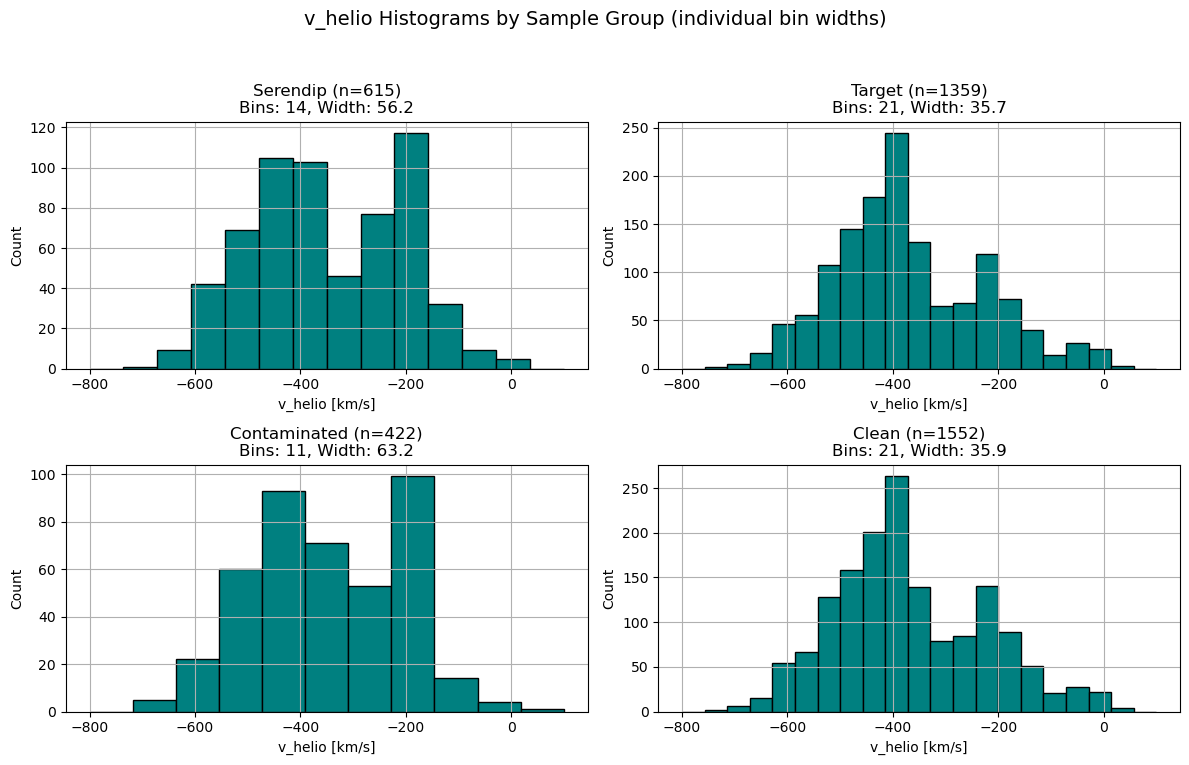

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

csv_path = r"C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final0730.csv"
df = pd.read_csv(csv_path)
df['v_helio'] = df['v_helio'].astype(float)

# Let's define groups based on the 'TYPE' and 'CONTAM' columns
groups = {
    'Serendip': df[df['TYPE'] == 'serendip'],
    'Target': df[df['TYPE'] == 'target'],
    'Contaminated': df[df['CONTAM'] >= 0.2],
    'Clean': df[df['CONTAM'] < 0.2],
}

v_range = (-800, 100)  # Common range for all histograms

# -----------------------------
# Optional: Bin width calculation (shared for all plots)
# -----------------------------
bin_info = {}  # to store bin_width and bin_count for each group

for key, group_df in groups.items():
    # v_range belonging
    mask = (group_df['v_helio'] >= v_range[0]) & (group_df['v_helio'] <= v_range[1])
    v = group_df['v_helio'][mask]
    n = len(v)

    if n == 0:
        bin_info[key] = {'bin_width': 50, 'bin_count': 10}
        continue

    iqr_val = iqr(v)
    bin_width = 2 * iqr_val / (n ** (1/3)) if n > 0 else 50
    #bin_width = max(bin_width, 30)  # 최소 bin width 보장
    bin_count = int(np.ceil((v.max() - v.min()) / bin_width))

    bin_info[key] = {'bin_width': bin_width, 'bin_count': bin_count}


# Plot 2x2 histogram subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f'v_helio Histograms by Sample Group (individual bin widths)', fontsize=14)

for ax, (title, group_df) in zip(axs.flat, groups.items()):
    mask = (group_df['v_helio'] >= v_range[0]) & (group_df['v_helio'] <= v_range[1])
    v = group_df['v_helio'][mask].values
    bw = bin_info[title]['bin_width']
    bc = bin_info[title]['bin_count']

    ax.hist(v, bins=bc, color='teal', edgecolor='black', range=v_range)
    ax.set_title(f'{title} (n={len(v)})\nBins: {bc}, Width: {bw:.1f}')
    ax.set_xlabel('v_helio [km/s]')
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

c:\Users\kom\anaconda3_39\envs\ucsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\kom\anaconda3_39\envs\ucsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\kom\anaconda3_39\envs\ucsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kom\anaconda3_39\envs\ucsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

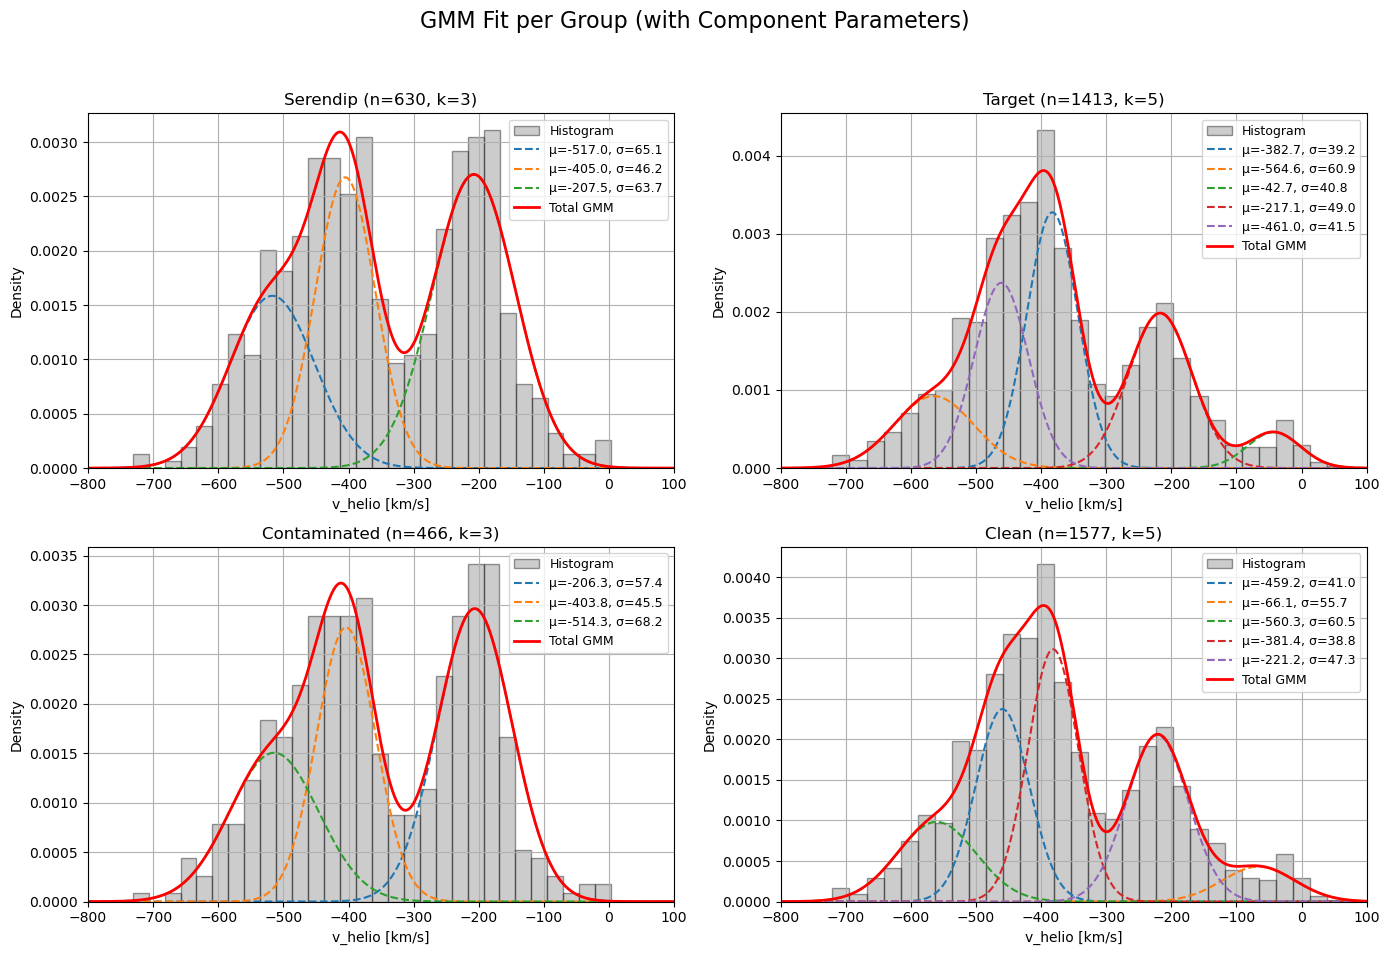

In [ ]:

#### OPTIONAL: Gaussian Mixture Model (GMM) fitting and plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import os
os.environ["OMP_NUM_THREADS"] = "1" # To avoid multithreading issues with GMM

# Load data
df = pd.read_csv(csv_path)
df = df[df['v_helio'].notna()]
df['v_helio'] = df['v_helio'].astype(float)

# Group definitions
groups = {
    'Serendip': df[df['TYPE'] == 'serendip'],
    'Target': df[df['TYPE'] == 'target'],
    'Contaminated': df[df['CONTAM'] >= 0.2],
    'Clean': df[df['CONTAM'] < 0.2],
}

# Number of Gaussian components per group
n_comp_list = [3,5,3,5]
v_range = (-800, 100)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('GMM Fit per Group (with Component Parameters)', fontsize=16)

for ax, (title, group_df), n_comp in zip(axs.flat, groups.items(), n_comp_list):
    vel = group_df['v_helio']
    vel = vel[(vel >= v_range[0]) & (vel <= v_range[1])].values

    if len(vel) < n_comp:
        ax.text(0.5, 0.5, f'Not enough data for {n_comp} components', ha='center', va='center', transform=ax.transAxes)
        continue

    # Fit GMM
    vel_array = vel.reshape(-1, 1)
    gmm = GaussianMixture(n_components=n_comp, random_state=52)
    gmm.fit(vel_array)

    means = gmm.means_.flatten()
    stds = np.sqrt(gmm.covariances_).flatten()
    weights = gmm.weights_.flatten()

    # Histogram
    ax.hist(vel, bins=30, density=True, alpha=0.4, color='gray', edgecolor='black', label='Histogram')

    # GMM curves
    x = np.linspace(v_range[0], v_range[1], 1000)
    y_total = np.zeros_like(x)

    for i in range(n_comp):
        y = weights[i] * norm.pdf(x, means[i], stds[i])
        y_total += y
        ax.plot(x, y, label=f'μ={means[i]:.1f}, σ={stds[i]:.1f}', linestyle='--')

    # Total mixture
    ax.plot(x, y_total, color='red', linewidth=2, label='Total GMM')

    # Labels
    ax.set_title(f"{title} (n={len(vel)}, k={n_comp})")
    ax.set_xlabel('v_helio [km/s]')
    ax.set_ylabel('Density')
    ax.set_xlim(v_range)
    ax.grid(True)
    ax.legend(fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Simple GMM -> Not works well. Need to use other accurate approach -> DYNESTY using!  
! pip install dynesty  
User defined Function : FunctionsM32

In [ ]:
import importlib
import FunctionsM32 as FM
importlib.reload(FM)
csv_path = FM.csv_path
r = 5.5  # kpc
# Using Tilted Ring Model From Chemin et al. 2009
print(f"PA({r} kpc) = {FM.PA_adopted(r):.2f} deg")
print(f"i({r} kpc) = {FM.i_adopted(r):.2f} deg")
print(f"V_rot({r} kpc) = {FM.rotational_velocity(r):.2f} km/s")

FM.compute_projected_radius(csv_path)

PA(5.5 kpc) = 34.57 deg
i(5.5 kpc) = 66.88 deg
V_rot(5.5 kpc) = 214.58 km/s
[INFO] xi/eta and R_disk initialized.
R_disk_kpc_init: min = 4.93, max = 19.30
     xi_kpc   eta_kpc  R_disk_kpc_init
0  0.095946 -6.012399        17.430918
1  0.101608 -6.018378        17.466118
2  0.091578 -6.010358        17.411086
3  0.088854 -6.007931        17.395436
4  0.085928 -6.004286        17.375669
[INFO] Saved updated file to: C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final0722.csv


,MASK,SLIT,star_name,RA,DEC,F814W,F475W,v_helio,TYPE,CONTAM,VEL_ERR,xi_kpc,eta_kpc,R_disk_kpc_init,v_rot_model,theta_j,R_disk_kpc_final,i_j_rad,PA_rad
0,M32RA1,3,M32RGB1,10.693943,40.825365,20.832000,24.582999,-209.813100,target,0.005140,1.682722,0.095946,-6.012399,17.430918,258.834872,1.914783,14.206135,1.295621,0.632961
1,M32RA1,3,os1,10.694495,40.824924,21.413001,24.265000,-421.705496,serendip,0.541532,NaN,0.101608,-6.018378,17.466118,258.756665,1.914044,14.233152,1.295373,0.633581
2,M32RA1,3,os2,10.693516,40.825516,21.667001,23.714000,-409.269227,serendip,0.068067,NaN,0.091578,-6.010358,17.411086,258.878924,1.915333,14.190917,1.295761,0.632611
3,M32RA1,3,os3,10.693251,40.825695,21.551000,24.224999,-176.444638,serendip,0.224423,NaN,0.088854,-6.007931,17.395436,258.913760,1.915686,14.178883,1.295871,0.632335
4,M32RA1,3,os4,10.692965,40.825964,21.059001,26.463000,-157.114852,serendip,0.032220,NaN,0.085928,-6.004286,17.375669,258.957822,1.916076,14.163662,1.296011,0.631985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,M32RE2B,98,AGB30293,10.487848,40.751203,20.578999,25.238000,-422.616413,target,0.041689,0.858269,-2.019128,-7.014913,13.888162,261.165835,2.090734,13.584152,1.332599,0.671200
1972,M32RE2B,168,RHeB3027,10.498054,40.738615,19.415999,21.894999,-439.136139,target,0.005282,0.288046,-1.914748,-7.185681,14.653803,260.426554,2.090927,13.788693,1.327058,0.659205
1973,M32RE2B,167,RHeB3015,10.557411,40.731922,19.455001,22.485000,-4.014170,target,0.020501,0.626750,-1.305571,-7.277455,16.679021,260.676961,2.077248,13.729222,1.300002,0.626842
1974,M32RE2B,182,RHeB30173,10.538911,40.813292,19.311000,22.082000,-437.980809,target,0.024935,0.256027,-1.493649,-6.174732,13.022751,265.240024,2.037801,12.787907,1.333386,0.673787


1976
1976


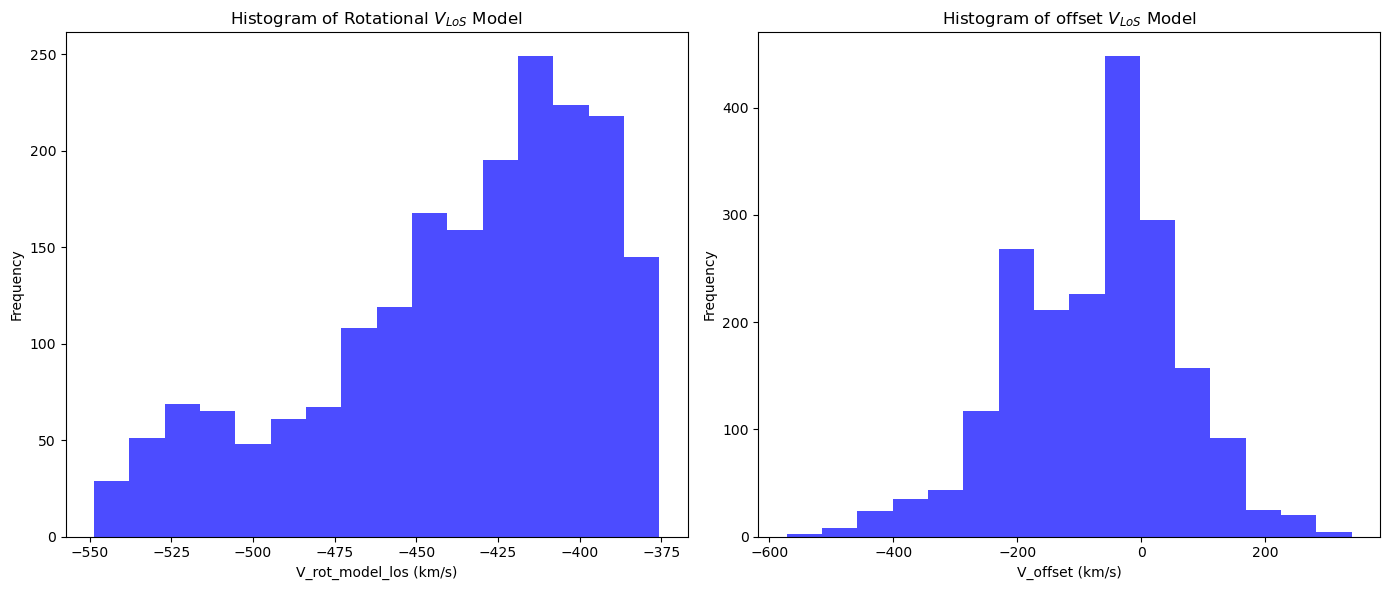

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
csv_df = pd.read_csv(FM.csv_path)
df = FM.iterate_R_disk_convergence(csv_df, max_iter=100, tol_inclination=0.01, tol_PA=0.35, D_M31=776.2, print=True)
df.to_csv(csv_path, index=False)
theta_j_all = df['theta_j'].values
i_j_rad_all = df['i_j_rad'].values
v_helio_all= df['v_helio'].values
v_rot_model_all = df['v_rot_model'].values
print(len(df))
v_offset, v_model_los = FM.calculate_voffset(1.21, v_rot_model_all, theta_j_all, i_j_rad_all, v_helio_all)
# Figure 및 Subplots 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 히스토그램: V_rot_model_los
axes[0].hist(v_model_los, bins=16, color='blue', alpha=0.7)
axes[0].set_xlabel('V_rot_model_los (km/s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title( r'Histogram of Rotational $V_{LoS}$ Model')



# 두 번째 히스토그램: v_offset
axes[1].hist(v_offset, bins=16, color='blue', alpha=0.7)
axes[1].set_xlabel('V_offset (km/s)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(r'Histogram of offset $V_{LoS}$ Model')

print(len(v_offset))
# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

Now setting the DYNESTY running with unified prior distribution, and different log likelihood definition

In [ ]:
from scipy.stats import norm, uniform
from dynesty import DynamicNestedSampler
import numpy as np
import pandas as pd
def sample_choose(df_raw, ser = False, clear = False, contam = False, target = False):
    """
    ser == True: serendipitous stars (680)
    clear == True: clear stars (1583)
    """
    if ser:
        df = df_raw[df_raw['TYPE'] == 'serendip'].copy()
    elif clear:
        df = df_raw[df_raw['CONTAM'] < 0.2].copy()
    elif contam:
        df = df_raw[df_raw['CONTAM'] >= 0.2].copy()
    elif target:
        df = df_raw[df_raw['TYPE'] == 'target'].copy()
    else:
        df = df_raw.copy()

    return df
def input_data(df):
    """
    df: DataFrame containing the data
    Returns: theta_j, i_j_rad, v_helio, v_rot_model
    """
    theta_j = df['theta_j'].values
    i_j_rad = df['i_j_rad'].values
    v_helio = df['v_helio'].values
    v_rot_model = df['v_rot_model'].values

    return theta_j, i_j_rad, v_helio, v_rot_model

df_raw = pd.read_csv(r"C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_0723.csv")

df_allstar = sample_choose(df_raw, ser=False, clear=False, contam=False)  # Modify this part!!! (2049개)
df_target = sample_choose(df_raw, ser=False, clear=False, contam=False, target=True)  # Target stars (400개)
df_ser = sample_choose(df_raw, ser=True, clear=False, contam=False)  # Serendipitous stars (680개)
df_clear = sample_choose(df_raw, ser=False, clear=True, contam=False)  # Clear stars (1583개)
df_contam = sample_choose(df_raw, ser=False, clear=False, contam=True)  # Contaminated stars (386개)

df = [df_allstar, df_ser, df_clear, df_contam]
#theta_j_tar, i_j_rad_tar, v_helio_tar, v_rot_model_tar = input_data(df_target)
#theta_j_ser, i_j_rad_ser, v_helio_ser, v_rot_model_ser = input_data(df_ser)
#theta_j_clear, i_j_rad_clear, v_helio_clear, v_rot_model_clear = input_data(df_clear)
#theta_j_contam, i_j_rad_contam, v_helio_contam, v_rot_model_contam = input_data(df_contam)

prior = FM.create_prior_distributions_5D()
prior_list = list(prior.values())

# Prior distribution output
print("Prior distributions:")
for key, dist in prior.items():
    print(f"{key:10s}: {dist}")

# 2. prior_transform define
def prior_transform(u):
    eps = 1e-6
    u = np.clip(u, eps, 1 - eps)
    return [dist.ppf(ui) for dist, ui in zip(prior_list, u)]
# 3. Dynesty Dynamic Sampler setting
ndim = len(prior)


Prior distributions:
sigma_disk: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638490B230>
f1        : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E89D310>
mu1       : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E89D590>
sigma1    : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E8B9BA0>
f2        : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E8B9E00>
mu2       : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638DF91B50>
sigma2    : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638DF8F350>
f3        : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E365150>
mu3       : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E358150>
sigma3    : <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001638E358250>

In [ ]:
samples = [df_target, df_ser, df_clear, df_contam]
# Minjae  : df_targetstar #1419
# Rhett   : df_ser       #630
# Yashika : df_clear     #1583
# Nishyanth : df_contam  #466

dsamplers = {}         # Dictionary to store samplers by model name
results_comp = {}      # Dictionary to store results by model name
theta_j, i_j_rad, v_helio, v_rot_model = input_data(df_target)  # Select your sample here !!

print(len(theta_j))


def log_likelihood_3comp(theta):
    sigma_disk, f1, mu1, sigma1, f2, mu2, sigma2, f3, mu3, sigma3, f4, mu4, sigma4,f_rot = theta
    disk_weight = 1.0 - (f1 + f2)  # f3, f4 not using here
    if disk_weight < 0 or any(f < 0 for f in (f1, f2)):
        return -np.inf
    if any(s <= 0 for s in (sigma_disk, sigma1, sigma2)):
        return -np.inf

    try:
        v_offset, v_model_los = FM.calculate_voffset(f_rot, v_rot_model, theta_j, i_j_rad, v_helio)
    except:
        return -np.inf
        # likelihood 계산
    pdf_vals = (
            disk_weight * norm.pdf(v_offset, loc=0.0, scale=sigma_disk) +
            f1 * norm.pdf(v_helio, loc=mu1, scale=sigma1) +
            f2 * norm.pdf(v_helio,loc=mu2, scale=sigma2)
        )
    return np.sum(np.log(pdf_vals + 1e-300))

def log_likelihood_4comp_GSS(theta):
    sigma_disk, f1, mu1, sigma1, f2, mu2, sigma2, f3, mu3, sigma3, f4, mu4, sigma4,f_rot = theta
    disk_weight = 1.0 - (f1 + f2 + f4)  # f3 not using here
    if disk_weight < 0 or any(f < 0 for f in (f1, f2, f4)):
        return -np.inf
    if any(s <= 0 for s in (sigma_disk, sigma1, sigma2, sigma4)):
        return -np.inf
    try:
        v_offset, v_model_los = FM.calculate_voffset(f_rot, v_rot_model, theta_j, i_j_rad, v_helio)
    except:
        return -np.inf
        # likelihood 계산
    pdf_vals = (
            disk_weight * norm.pdf(v_offset, loc=0.0, scale=sigma_disk) +
            f1 * norm.pdf(v_helio, loc=mu1, scale=sigma1) +
            f2 * norm.pdf(v_helio, loc=mu2, scale=sigma2) +
            f4 * norm.pdf(v_helio, loc=mu4, scale=sigma4)
        )
    return np.sum(np.log(pdf_vals + 1e-300))

def log_likelihood_4comp_MW(theta):
    sigma_disk, f1, mu1, sigma1, f2, mu2, sigma2, f3, mu3, sigma3, f4, mu4, sigma4, f_rot = theta
    disk_weight = 1.0 - (f1 + f2 + f3)  # f4 not using here
    if disk_weight < 0 or any(f < 0 for f in (f1, f2, f3)):
        return -np.inf
    if any(s <= 0 for s in (sigma_disk, sigma1, sigma2, sigma3)):
        return -np.inf
    try:
        v_offset, v_model_los = FM.calculate_voffset(f_rot, v_rot_model, theta_j, i_j_rad, v_helio)
    except:
        return -np.inf
        # likelihood calculation
    pdf_vals = (
            disk_weight * norm.pdf(v_offset, loc=0.0, scale=sigma_disk) +
            f1 * norm.pdf(v_helio, loc=mu1, scale=sigma1) +
            f2 * norm.pdf(v_helio, loc=mu2, scale=sigma2) +
            f3 * norm.pdf(v_helio, loc=mu3, scale=sigma3)
        )
    return np.sum(np.log(pdf_vals + 1e-300))

def log_likelihood_5comp(theta):
    sigma_disk, f1, mu1, sigma1, f2, mu2, sigma2, f3, mu3, sigma3, f4, mu4, sigma4,f_rot = theta
    disk_weight = 1.0 - (f1 + f2 + f3+ f4)
    if disk_weight < 0 or any(f < 0 for f in (f1, f2,f3,f4)):
        return -np.inf
    if any(s <= 0 for s in (sigma_disk, sigma1, sigma2,sigma3, sigma4)):
        return -np.inf
    try:
        v_offset, v_model_los = FM.calculate_voffset(f_rot, v_rot_model, theta_j, i_j_rad, v_helio)
    except:
        return -np.inf
        # likelihood 계산
    pdf_vals = (
            disk_weight * norm.pdf(v_offset, loc=0.0, scale=sigma_disk) +
            f1 * norm.pdf(v_helio, loc=mu1, scale=sigma1) +
            f2 * norm.pdf(v_helio, loc=mu2, scale=sigma2) +
            f3 * norm.pdf(v_helio, loc=mu3, scale=sigma3) +
            f4 * norm.pdf(v_helio, loc=mu4, scale=sigma4)
        )
    return np.sum(np.log(pdf_vals + 1e-300))


1419


In [ ]:

# Define likelihood functions for each model
likelihoods = {
    "3comp": log_likelihood_3comp,
    "4comp_GSS": log_likelihood_4comp_GSS,
    "4comp_MW": log_likelihood_4comp_MW,
    "5comp": log_likelihood_5comp
}


# Run nested sampling for each model
for model_name, likelihood_function in likelihoods.items():
    dsampler = DynamicNestedSampler(
        likelihood_function,
        prior_transform,
        ndim=ndim,
        bound='multi',
        sample='rwalk'
    )

    dsampler.run_nested(dlogz_init=0.1, print_progress=True)

    # Store sampler and result in dictionaries
    dsamplers[model_name] = dsampler
    results_comp[model_name] = dsampler.results




8624it [06:58, 17.36it/s, batch: 0 | bound: 94 | nc: 34 | ncall: 254817 | eff(%):  3.378 | loglstar:   -inf < -9090.847 <    inf | logz: -9109.035 +/-    nan | dlogz: 10.726 >  0.100]

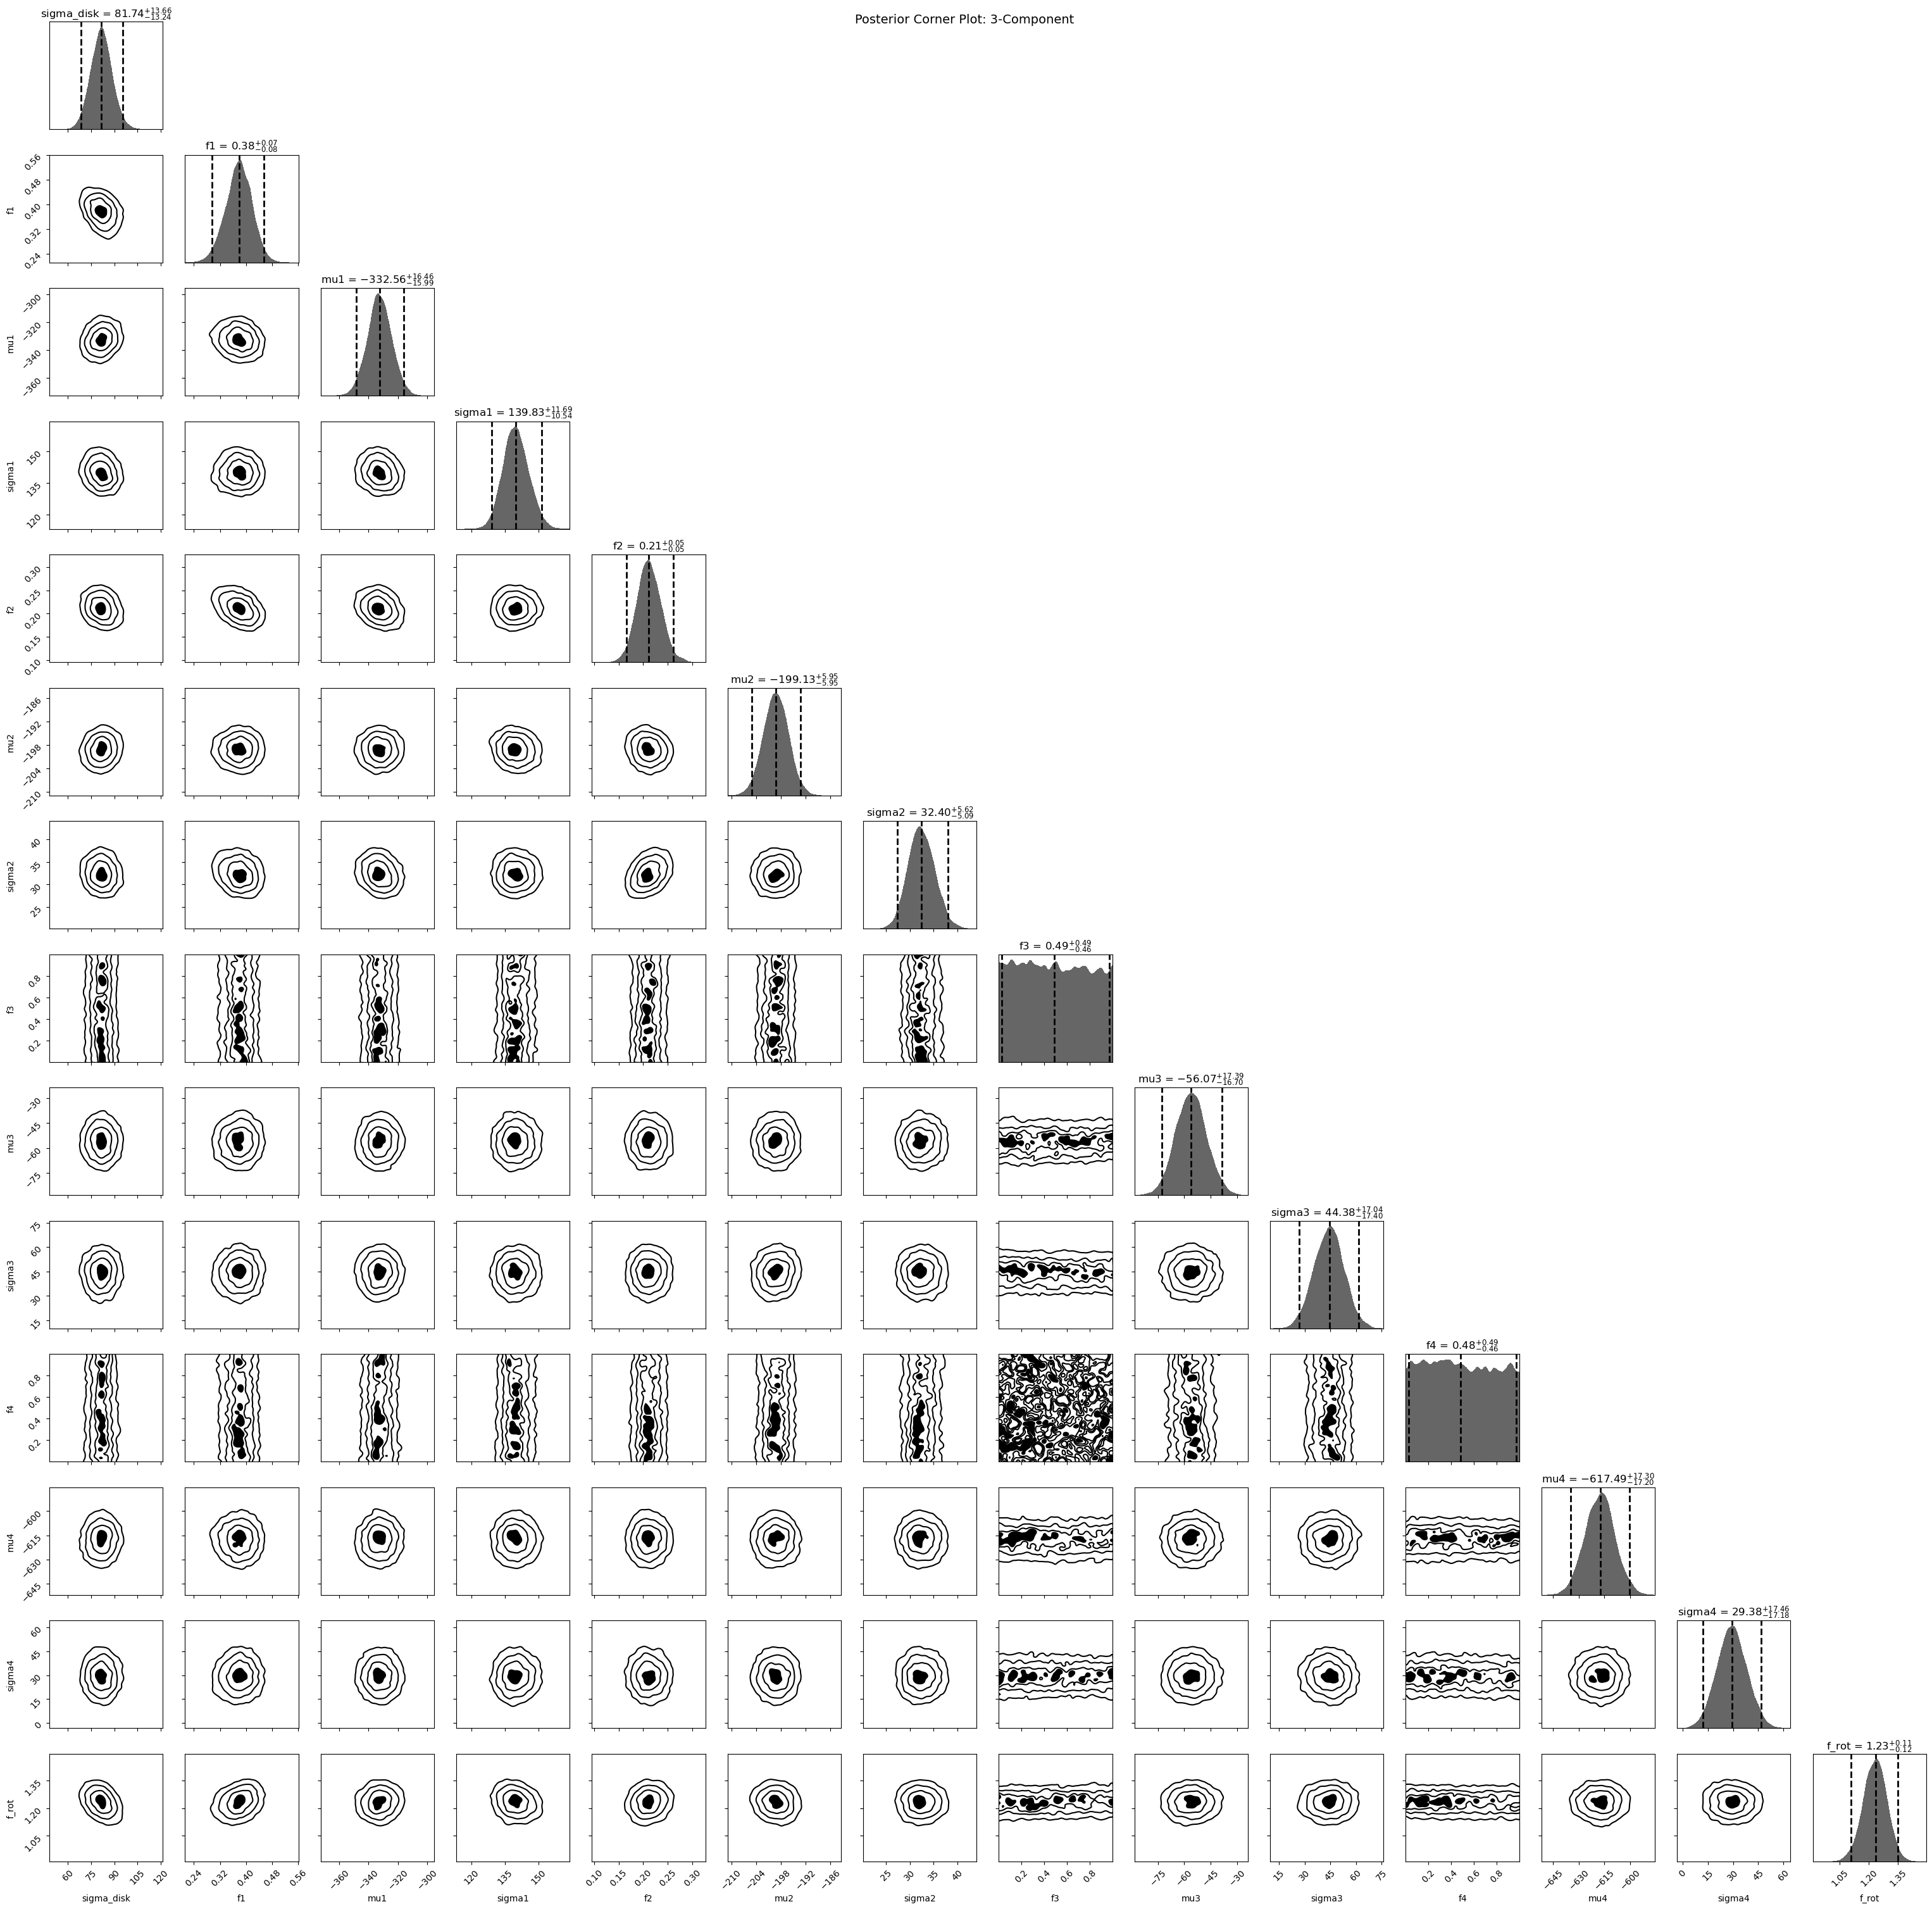

In [ ]:
from dynesty import plotting as dyplot
import matplotlib.pyplot as plt

# OPTIONAL : Corner Plot : To check whether training was good or bad

# Define sample labels (if you are plotting by model name, use model_labels)
model_labels = {
    "3comp": "3-Component",
    #"4comp_GSS": "4-Component (GSS)",
    #"4comp_MW": "4-Component (MW)",
    #"5comp": "5-Component"
}

# Assuming prior is a dictionary with parameter names
param_labels = list(prior.keys())

# Plotting corner plots for each model result
for model_name, result in results_comp.items():
    fig, axes = dyplot.cornerplot(
        result,
        show_titles=True,
        title_fmt=".2f",
        labels=param_labels
    )
    fig.suptitle(f"Posterior Corner Plot: {model_labels[model_name]}", fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Define parameter names from prior (or use custom labels)
param_names = list(prior.keys())

# Labels for model types used in analysis
model_labels = {
    "3comp": "3-Component",
    "4comp_GSS": "4-Component (GSS)",
    "4comp_MW": "4-Component (MW)",
    "5comp": "5-Component"
}

# Storage for summary statistics
medians_all = {}
cred_intervals_all = {}

# Compute statistics for each model's posterior samples
for model_name, res in results_comp.items():
    samples = res.samples  # Shape: (n_samples, n_params)

    # Compute percentiles
    q16, q50, q84 = np.percentile(samples, [16, 50, 84], axis=0)

    # Median (50th percentile)
    medians_all[model_name] = dict(zip(param_names, q50))

    # Symmetric 68% credible intervals
    ci_dict = {
        name: (low, high)
        for name, low, high in zip(param_names, q16 - q50, q84 - q50)
    }
    cred_intervals_all[model_name] = ci_dict

# Convert to DataFrames
df_medians = pd.DataFrame.from_dict(medians_all, orient='index')
df_cred_intervals = pd.DataFrame.from_dict(cred_intervals_all, orient='index')

# Rename columns for credible intervals
df_cred_intervals.columns = [f"{col}_68CI" for col in df_cred_intervals.columns]

# Save to CSV
df_medians.to_csv('medians_summary.csv')
df_cred_intervals.to_csv('cred_intervals_summary.csv')

print("✅ Summary statistics saved: 'medians_summary.csv' and 'cred_intervals_summary.csv'")

✅ Summary statistics saved: 'medians_summary.csv' and 'cred_intervals_summary.csv'


In [ ]:
def parse_param_dict(param_values):
    """
    Convert flat parameter list into dict based on number of components (3 or 5).
    Format:
      - 5-comp: ['sigma_disk', f1, mu1, sigma1, ..., f4, mu4, sigma4, 'f_rot']
      - 3-comp: ['sigma_disk', f1, mu1, sigma1, f2, mu2, sigma2, 'f_rot']
    """

    param_dict = {}
    length = len(param_values)

    if length == 14:  # 5 components
        param_dict['sigma_disk'] = param_values[0]
        idx = 1
        for i in range(1, 5):  # f1 ~ f4
            param_dict[f'f{i}']     = param_values[idx]; idx += 1
            param_dict[f'mu{i}']    = param_values[idx]; idx += 1
            param_dict[f'sigma{i}'] = param_values[idx]; idx += 1
        param_dict['f_rot'] = param_values[idx]

    elif length == 8:  # 3 components
        param_dict['sigma_disk'] = param_values[0]
        idx = 1
        for i in range(1, 3):  # f1, f2 only
            param_dict[f'f{i}']     = param_values[idx]; idx += 1
            param_dict[f'mu{i}']    = param_values[idx]; idx += 1
            param_dict[f'sigma{i}'] = param_values[idx]; idx += 1
        param_dict['f_rot'] = param_values[idx]

    else:
        raise ValueError(f"Unsupported parameter length: {length}. Expected 8 (3-comp) or 14 (5-comp).")

    return param_dict

def compute_P_M32(
    df_star,
    params_row,
    m32_component_index=2,
    f_rot_key='f_rot',
    sigma_disk_key='sigma_disk',
    v_sys=-300
):
    """
    Compute P_M32 with a dynamically computed M31 disk component
    using v_offset and a 0-centered Gaussian PDF.

    Parameters:
        df_star (pd.DataFrame): DataFrame with v_helio, theta_j, i_j_rad, v_rot_model
        params_row (dict or pd.Series): Model parameters, including f1, mu1, ..., fN
        m32_component_index (int): Index of M32 component in list of f{n}
        f_rot_key (str): Key for f_rot in params_row
        sigma_disk_key (str): Key for sigma_disk in params_row
        v_sys (float): Systemic velocity for voffset
        voffset_func (callable): Function to compute voffset

    Returns:
        np.ndarray: P_M32 per star
    """

    theta_vals, i_vals, v_vals, v_rot_vals = FM.input_data(df_star)  # Select your sample here !!
    # Step 1: Calculate v_offset
    v_offset, v_model_los = FM.calculate_voffset(
        f_rot=params_row[f_rot_key],
        v_rot_model=v_rot_vals,
        theta_j=theta_vals,
        i_j_rad=i_vals,
        v_helio=v_vals,
        v_sys=v_sys
    )

    # Step 2: Build list of Gaussian components
    comp_list = []
    total_f = 0
    for i in range(1, 5):  # f1~f4
        f_key, mu_key, sig_key = f"f{i}", f"mu{i}", f"sigma{i}"
        if f_key in params_row:
            f_k = params_row[f_key]
            mu_k = params_row[mu_key]
            sigma_k = params_row[sig_key]
            comp_list.append((f_k, mu_k, sigma_k))
            total_f += f_k

    # Step 3: Disk component weight
    f_disk = 1.0 - total_f
    sigma_disk = params_row[sigma_disk_key]

    # Step 4: M32 component
    f_m32, mu_m32, sigma_m32 = comp_list[m32_component_index - 1]
    numer = f_m32 * norm.pdf(v_vals, loc=mu_m32, scale=sigma_m32)

    # Step 5: Denominator = sum over all components (disk + Gaussians)
    denom = np.zeros_like(v_vals)

    # Gaussian components
    for f_k, mu_k, sigma_k in comp_list:
        denom += f_k * norm.pdf(v_vals, loc=mu_k, scale=sigma_k)

    # Disk component: zero-centered Gaussian in v_offset space
    denom += f_disk * norm.pdf(v_offset, loc=0, scale=sigma_disk)

    # Step 6: Final probability
    with np.errstate(divide='ignore', invalid='ignore'):
        P_M32 = np.where(denom > 0, numer / denom, 0.0)

    return P_M32


In [ ]:
# 예시 param_values (길이 다름)
param_target = [65.03, 0.39, -333.88, 169.55, 0.10, -201.18, 29.81, 0.02, -46.68, 37.42, 0.03, -612.65, 34.05, 1.02]
param_ser    = [83.05, 0.37, -331.9, 140.31, 0.22, -198.94, 32.61,  1.21]
param_clear = [69.95, 0.38, -332.63, 169.76, 0.10, -201.20, 30.38, 0.02, -49.26, 39.96, 0.03, -609.59, 34.06, 1.03]
param_contam  = [78.94, 0.36, -334.43, 135.72, 0.224, -198.32, 30.65,  1.20]

# 그룹별 param_dict로 변환
param_target_dict  = parse_param_dict(param_target)
param_ser_dict     = parse_param_dict(param_ser)
param_contam_dict  = parse_param_dict(param_contam)
param_clear_dict   = parse_param_dict(param_clear)

# M32가 몇 번째 component인지 설정 (사례에 따라 다를 수 있음)
m32_idx = 2

# 확률 계산
df_target['P_M32']   = compute_P_M32(df_target, param_target_dict, m32_component_index=m32_idx)
df_ser['P_M32']      = compute_P_M32(df_ser, param_ser_dict, m32_component_index=m32_idx)
df_contam['P_M32']   = compute_P_M32(df_contam, param_contam_dict, m32_component_index=m32_idx)
df_clear['P_M32']    = compute_P_M32(df_clear, param_clear_dict, m32_component_index=m32_idx)

print("\n=== Top 5 P_M32 values per group ===")
for name, df in zip(
    ['Target', 'Serendip', 'Contaminated', 'Clean'],
    [df_target, df_ser, df_contam, df_clear]
):
    print(f"\n{name} Top 5:")
    print(df[['v_helio', 'P_M32']].sort_values(by='P_M32', ascending=False).head(5))



=== Top 5 P_M32 values per group ===

Target Top 5:
         v_helio     P_M32
850  -193.422453  0.662250
1096 -198.267537  0.661135
1018 -191.519013  0.661120
1405 -197.785041  0.659921
1934 -195.644171  0.659678

Serendip Top 5:
         v_helio     P_M32
1167 -185.076104  0.797222
1489 -198.167555  0.796003
1246 -188.864693  0.793859
305  -188.078940  0.793585
1111 -190.422651  0.793496

Contaminated Top 5:
         v_helio     P_M32
1489 -198.167555  0.816738
1111 -190.422651  0.816166
1715 -187.051110  0.814326
1533 -187.051449  0.814053
1724 -193.911798  0.813960

Clean Top 5:
         v_helio     P_M32
850  -193.422453  0.659764
1018 -191.519013  0.659496
121  -188.542507  0.658711
1096 -198.267537  0.656909
356  -187.904362  0.656810


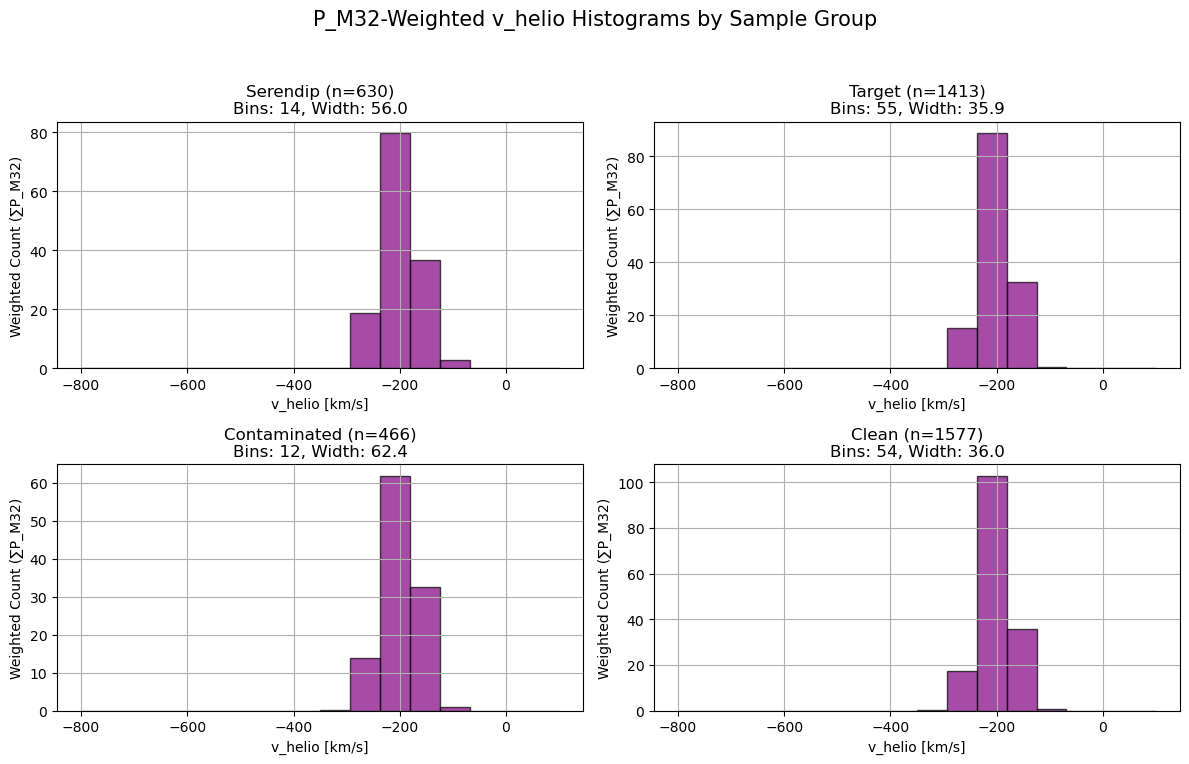

In [ ]:
from scipy.stats import iqr

df = pd.read_csv(csv_path)
df['v_helio'] = df['v_helio'].astype(float)

# Define groups (assumes P_M32 already added to df before this)
groups = {
    'Serendip': df_ser,
    'Target': df_target,
    'Contaminated': df_contam,
    'Clean': df_clear
}

v_range = (-800,100)

# Bin width and count calculation
bin_info = {}
for key, group_df in groups.items():
    #mask = (group_df['v_helio'] >= v_range[0]) & (group_df['v_helio'] <= v_range[1])
    v = group_df['v_helio']
    n = len(v)

    if n == 0:
        bin_info[key] = {'bin_width': 50, 'bin_count': 10}
        continue

    iqr_val = iqr(v)
    bin_width = 2 * iqr_val / (n ** (1/3))
    bin_count = int(np.ceil((v.max() - v.min()) / bin_width))
    bin_info[key] = {'bin_width': bin_width, 'bin_count': bin_count}

bin_n = 16
# Plot weighted histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('P_M32-Weighted v_helio Histograms by Sample Group', fontsize=15)

for ax, (title, group_df) in zip(axs.flat, groups.items()):
    mask = (group_df['v_helio'] >= v_range[0]) & (group_df['v_helio'] <= v_range[1])
    v = group_df.loc[mask, 'v_helio'].values
    w = group_df.loc[mask, 'P_M32'].values if 'P_M32' in group_df.columns else np.ones_like(v)

    bw = bin_info[title]['bin_width']
    bc = bin_info[title]['bin_count']

    ax.hist(v, bins=bin_n, weights=w, range=v_range,
            color='purple', edgecolor='black', alpha=0.7)
    ax.set_title(f"{title} (n={len(v)})\nBins: {bc}, Width: {bw:.1f}")
    ax.set_xlabel("v_helio [km/s]")
    ax.set_ylabel("Weighted Count (∑P_M32)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Now, let's compare the weighted distribution with M32 membership probability for the Inner radius vs Outer radius.  
- Use Radius profile as the projected radius from the M32 center.  
- R_iso is defined as isophotal contours start to distort.  


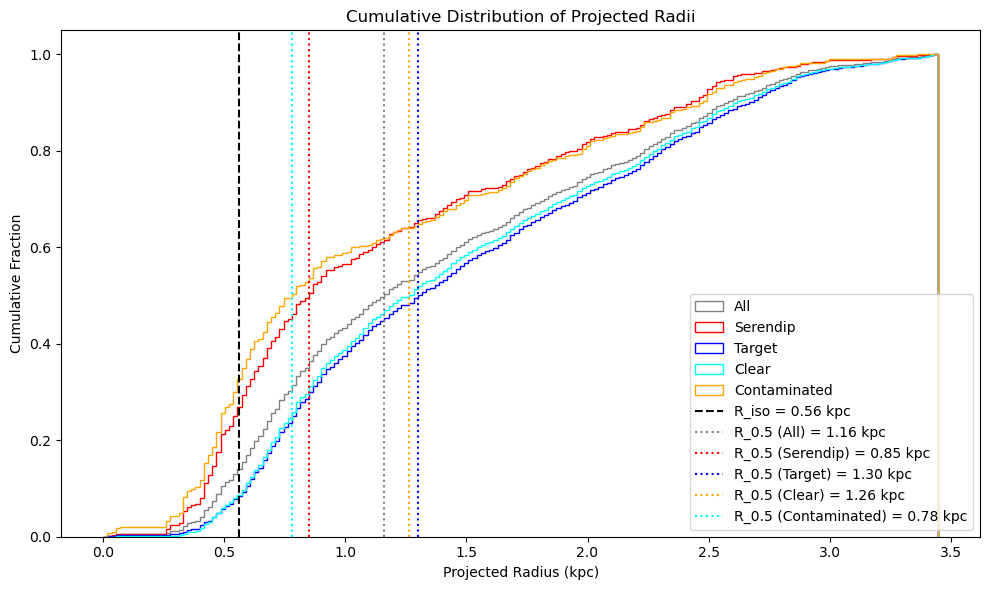

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File import
csv_path  = r"C:\Users\kom\OneDrive\바탕 화면\25 UCSC\Research\CoreData\M32_final0722.csv"
df = pd.read_csv(csv_path)

# M32 center coordinates
ra0_deg  = (0 + 42/60 + 41.82/3600) * 15
dec0_deg = 40 + 51/60 + 53.45/3600
R_iso = 0.56  # kpc

# Define Projected Radius Calculation Function
def projected_radius(ra_deg, dec_deg, ra0=ra0_deg, dec0=dec0_deg, D_M32_kpc=776, theta_deg=170.0, q=0.73):
    dra = (np.array(ra_deg) - ra0) * np.cos(np.radians(dec0)) * 3600  # arcsec
    ddec = (np.array(dec_deg) - dec0) * 3600  # arcsec
    theta_rad = np.radians(theta_deg)
    x_prime = dra * np.cos(theta_rad) + ddec * np.sin(theta_rad)
    y_prime = -dra * np.sin(theta_rad) + ddec * np.cos(theta_rad)
    R_ell_arcsec = np.sqrt(x_prime**2 + (y_prime / q)**2)
    return D_M32_kpc * (R_ell_arcsec / 206265)  # kpc

# Column addition
df['R_proj_kpc'] = projected_radius(df['RA'], df['DEC'])
df.to_csv(csv_path, index=False)

mask_in = df['R_proj_kpc']<R_iso
mask_out = df['R_proj_kpc']>R_iso
mask_vel = (df['v_helio']<100) & (df['v_helio']>-800)
df_allstar = sample_choose(df_raw[mask_vel], ser=False, clear=False, contam=False)  # Modify this part!!! (2049개)
df_target = sample_choose(df_raw[mask_vel], ser=False, clear=False, contam=False, target=True)  # Target stars (400개)
df_ser = sample_choose(df_raw[mask_vel], ser=True, clear=False, contam=False)  # Serendipitous stars (680개)
df_clear = sample_choose(df_raw[mask_vel], ser=False, clear=True, contam=False)  # Clear stars (1583개)
df_contam = sample_choose(df_raw[mask_vel], ser=False, clear=False, contam=True)  # Contaminated stars (386개)

# Cumulative Histogram Setting
n = 200
bins = np.linspace(0, df['R_proj_kpc'].max(), n)

# 9. 누적 분포 계산
def cumulative_half_radius(values, bins):
    hist, bin_edges = np.histogram(values, bins=bins, density=True)
    cum = np.cumsum(hist * np.diff(bin_edges))
    r_half = bin_edges[np.searchsorted(cum, 0.5)]
    return r_half

r_half_total = cumulative_half_radius(df['R_proj_kpc'], bins)
r_half_serendip = cumulative_half_radius(df_ser['R_proj_kpc'], bins)
r_half_target = cumulative_half_radius(df_target['R_proj_kpc'], bins)
r_half_clear = cumulative_half_radius(df_clear['R_proj_kpc'], bins)
r_half_contam = cumulative_half_radius(df_contam['R_proj_kpc'], bins)


# 10. 시각화
plt.figure(figsize=(10, 6))
plt.hist(df_allstar['R_proj_kpc'], bins=bins, cumulative=True, density=True,
         histtype='step', color='grey', label='All')
plt.hist(df_ser['R_proj_kpc'], bins=bins, cumulative=True, density=True,
         histtype='step', color='red', label='Serendip')
plt.hist(df_target['R_proj_kpc'], bins=bins, cumulative=True, density=True,
         histtype='step', color='blue', label='Target')
plt.hist(df_clear['R_proj_kpc'], bins=bins, cumulative=True, density=True,
         histtype='step', color='cyan', label='Clear')
plt.hist(df_contam['R_proj_kpc'], bins=bins, cumulative=True, density=True,
         histtype='step', color='orange', label='Contaminated')
# 수직선 추가 (R_iso, r_half들)
plt.axvline(R_iso, color='black', linestyle='--', label=f'R_iso = {R_iso:.2f} kpc')
plt.axvline(r_half_total, color='grey', linestyle=':', label=f'R_0.5 (All) = {r_half_total:.2f} kpc')
plt.axvline(r_half_serendip, color='red', linestyle=':', label=f'R_0.5 (Serendip) = {r_half_serendip:.2f} kpc')
plt.axvline(r_half_target, color='blue', linestyle=':', label=f'R_0.5 (Target) = {r_half_target:.2f} kpc')
plt.axvline(r_half_clear, color='orange', linestyle=':', label=f'R_0.5 (Clear) = {r_half_clear:.2f} kpc')
plt.axvline(r_half_contam, color='cyan', linestyle=':', label=f'R_0.5 (Contaminated) = {r_half_contam:.2f} kpc')
# 라벨 및 범례
plt.xlabel("Projected Radius (kpc)")
plt.ylabel("Cumulative Fraction")
plt.title("Cumulative Distribution of Projected Radii")
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()


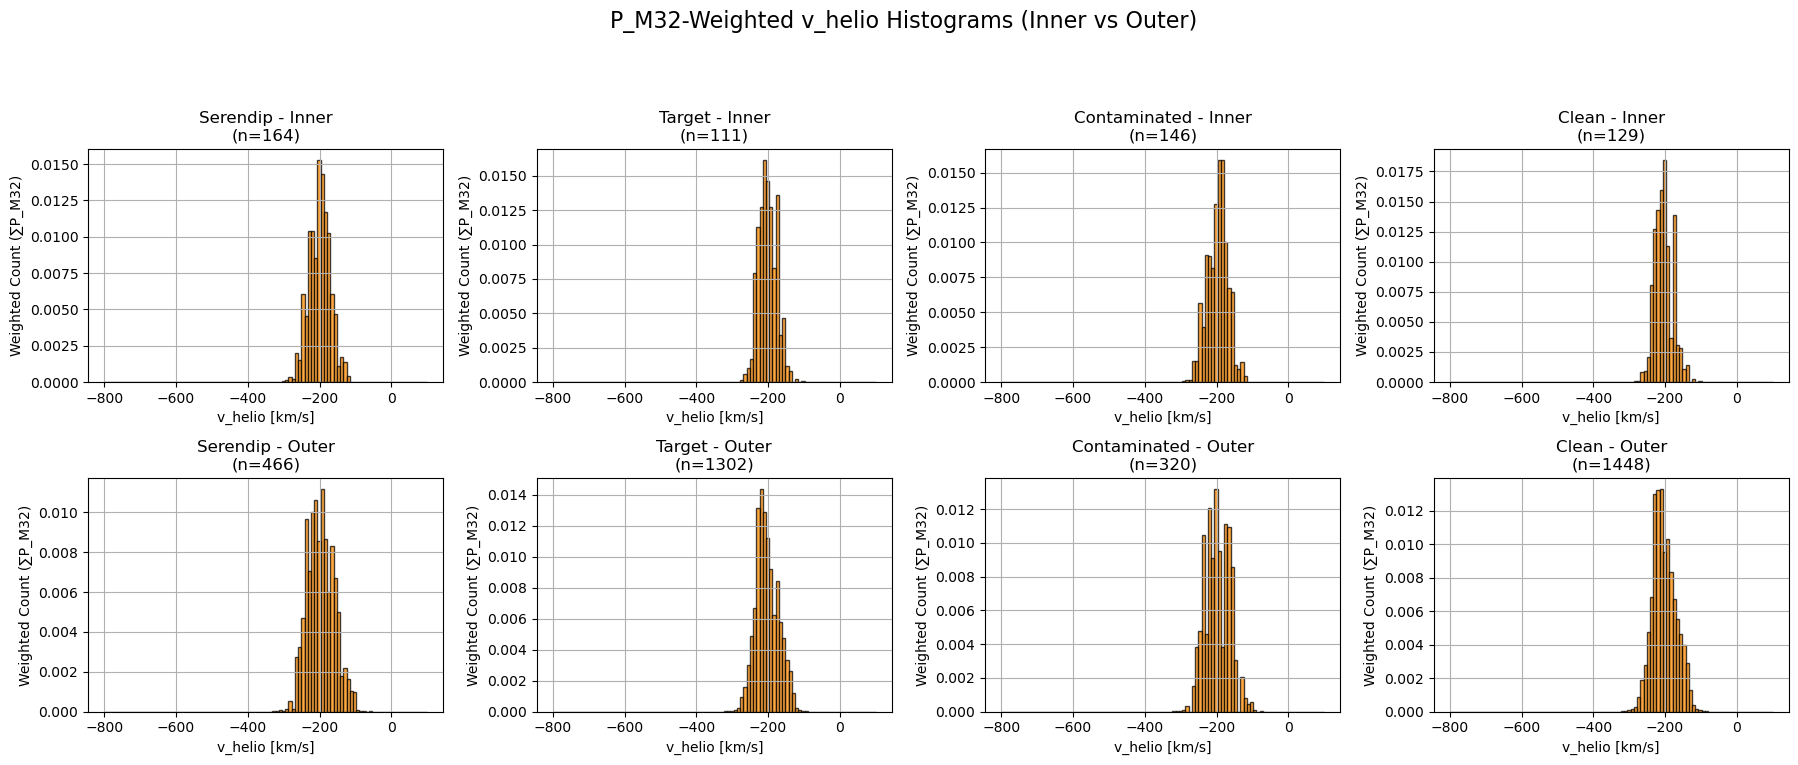

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
import FunctionsM32 as FM
csv_path = FM.csv_path
# Load data
df = pd.read_csv(csv_path)
df['v_helio'] = df['v_helio'].astype(float)
df_target['P_M32']   = compute_P_M32(df_target, param_target_dict, m32_component_index=m32_idx)
df_ser['P_M32']      = compute_P_M32(df_ser, param_ser_dict, m32_component_index=m32_idx)
df_contam['P_M32']   = compute_P_M32(df_contam, param_contam_dict, m32_component_index=m32_idx)
df_clear['P_M32']    = compute_P_M32(df_clear, param_clear_dict, m32_component_index=m32_idx)
# Ensure 'R_proj_kpc' exists
assert 'R_proj_kpc' in df.columns, "R_proj_kpc column is missing"

# Define sample groups
groups = {
    'Serendip': df_ser,
    'Target': df_target,
    'Contaminated': df_contam,
    'Clean': df_clear
}

bin_n = 100
# Prepare subplot
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle('P_M32-Weighted v_helio Histograms (Inner vs Outer)', fontsize=16)

# Loop over each group
for col_idx, (title, group_df) in enumerate(groups.items()):
    for row_idx, region in enumerate(['Inner', 'Outer']):
        ax = axs[row_idx, col_idx]

        if region == 'Inner':
            mask_radial = group_df['R_proj_kpc'] < R_iso
        else:
            mask_radial = group_df['R_proj_kpc'] > R_iso

        final_mask = mask_radial

        v = group_df.loc[final_mask, 'v_helio'].values
        w = group_df.loc[final_mask, 'P_M32'].values


        ax.hist(v, bins=bin_n, weights=w, range=v_range,
                color='darkorange', edgecolor='black', alpha=0.75, density = True)
        ax.set_title(f"{title} - {region}\n(n={len(v)})")
        ax.set_xlabel("v_helio [km/s]")
        ax.set_ylabel("Weighted Count (∑P_M32)")
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


From this, let's calculate the statistical moment (up to 4th) and compare them.
| Statistic     | Meaning        | Key Characteristics                             |
|---------------|----------------|--------------------------------------------------|
| **Mean**      | Central Tendency | The average value of the data                    |
| **Variance**  | Spread           | The mean of squared deviations from the mean     |
| **Skewness**  | Asymmetry       | Positive: right tail; Negative: left tail        |
| **Kurtosis**  | Tail Thickness  | >3: peaked with heavy tails; <3: flat with light tails |


In [ ]:
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np

# 저장할 결과 리스트
moment_records = []
# 통계 계산용 함수 (가중치 포함)
def weighted_stats(data, weights):
    mean = np.average(data, weights=weights)
    sigma = np.sqrt(np.average((data - mean)**2, weights=weights))
    skewness = np.average(((data - mean)/sigma)**3, weights=weights)
    excess_kurt = np.average(((data - mean)/sigma)**4, weights=weights)-3
    return mean, sigma, skewness, excess_kurt

# 루프: 그룹 x 영역
for group_name, group_df in groups.items():
    for region_label, region_mask in [('Inner', group_df['R_proj_kpc'] < R_iso),
                                      ('Outer', group_df['R_proj_kpc'] > R_iso)]:

        mask = region_mask
        v = group_df.loc[mask, 'v_helio'].values
        w = group_df.loc[mask, 'P_M32'].values if 'P_M32' in group_df.columns else np.ones_like(v)
        print(len(v),len(w))
        mu, sigma, sk, ku = weighted_stats(v, w)
        moment_records.append({
            'Group': group_name,
            'Region': region_label,
            'Number of stars': len(v),
            'Fraction': np.sum(w)/len(v),
            'Mean': mu,
            'standard deviation': sigma,
            'Skewness': sk,
            'Excess Kurtosis': ku
        })

# 결과를 DataFrame으로 정리
moment_df = pd.DataFrame(moment_records)
print("\n=== Velocity Moment Summary ===")
print(moment_df.to_string(index=False))


164 164
466 466
111 111
1302 1302
146 146
320 320
129 129
1448 1448

=== Velocity Moment Summary ===
       Group Region  Number of stars  Fraction        Mean  standard deviation  Skewness  Excess Kurtosis
    Serendip  Inner              164  0.408854 -201.169740           29.558582 -0.007865        -0.048538
    Serendip  Outer              466  0.151886 -198.013243           36.525511  0.206573        -0.279958
      Target  Inner              111  0.308035 -202.116596           24.586026  0.196753        -0.184260
      Target  Outer             1302  0.078756 -203.459600           31.638420  0.237194        -0.241082
Contaminated  Inner              146  0.425039 -198.443826           28.680883 -0.136265        -0.105561
Contaminated  Outer              320  0.147721 -198.717664           33.363300  0.114776        -0.351214
       Clean  Inner              129  0.296011 -204.461126           24.654236  0.344362         0.165598
       Clean  Outer             1448  0.081902 -202

Now, move on to the rotational model of M32


In [ ]:
import numpy as np
from scipy.stats import norm
def model_velocity(R_proj_kpc, theta_j_deg, k_R, theta_R_rad, mu_M32):
    theta_rad = np.radians(theta_j_deg)-theta_R_rad
    return mu_M32 - k_R * np.cos(theta_rad)


def log_likelihood(params, v_helio, R_proj_kpc, theta_j_deg, P_M32, mu_M32, sigma_M32):
    k_R, theta_R_rad = params  # Free parameters

    v_model = model_velocity(R_proj_kpc, theta_j_deg, k_R, theta_R_rad, mu_M32)
    logL_each = norm.logpdf(v_helio, loc=v_model, scale=sigma_M32)
    weighted_logL = P_M32 * logL_each
    return np.sum(weighted_logL)

def prior_transform(u):
    # u[0] ~ N(10, 4.4): using inverse CDF transform
    kR = norm.ppf(u[0], loc=10, scale=4.4)

    # u[1] ~ Uniform[0, 2π]
    theta_R_rad = 2 * np.pi * u[1]  # in radians

    return [kR, theta_R_rad]
def summarize_posterior(samples):
    q16, q50, q84 = np.percentile(samples, [16, 50, 84], axis=0)
    return {
        'kR_median': q50[0],
        'kR_minus': q50[0] - q16[0],
        'kR_plus': q84[0] - q50[0],
        'thetaR_median_deg': np.degrees(q50[1]),
        'thetaR_minus_deg': np.degrees(q50[1] - q16[1]),
        'thetaR_plus_deg': np.degrees(q84[1] - q50[1])
    }

In [ ]:
from dynesty import DynamicNestedSampler
from scipy.stats import norm
import numpy as np
import pandas as pd

# 사전 정의된 groups, R_iso, prior_transform, log_likelihood, etc. 가 있다고 가정

# === 첫 번째 Group × Region 조합만 실행 ===
group_items = list(groups.items())
if not group_items:
    raise ValueError("No group data available.")

first_group_name, first_group_df = group_items[0]

# Inner region만 예시로 실행
region_label = 'Inner'
region_mask = first_group_df['R_proj_kpc'] < R_iso
df_sub = first_group_df.loc[region_mask].copy()

if len(df_sub) < 20:
    raise ValueError("Not enough stars in the selected region for analysis.")

# 관측값 준비
v_obs   = df_sub['v_helio'].values
w       = df_sub['P_M32'].values
r_proj  = df_sub['R_proj_kpc'].values
if 'PA_rad' not in df_sub.columns:
    raise KeyError("Column 'PA_rad' is missing.")
pa_diff = df_sub['PA_rad'].values - np.radians(170.0)  # 중심 major axis 기준 차이

# likelihood 함수
loglike = lambda theta: log_likelihood(
    theta, v_obs, w, r_proj, pa_diff,
    mu_M32=-200.0, sigma_M32=30.0
)

# Dynamic sampler 실행
ndim = 2  # kR, thetaR
dsampler = DynamicNestedSampler(
    loglike,
    prior_transform,
    ndim=ndim,
    bound='multi',
    sample='rwalk'
)
dsampler.run_nested(dlogz_init=0.5, print_progress=True, maxcall=5000000, maxbatch = 10
    nlive_init=300)  # 안정성을 위해 줄임)

# 결과 저장
model_key = f"{first_group_name}_{region_label}"
dsamplers = {model_key: dsampler}
results_comp = {model_key: dsampler.results}

print(f"Finished sampling for model: {model_key}")


In [ ]:
from dynesty import DynamicNestedSampler
from scipy.stats import norm
import numpy as np
import pandas as pd

# 저장용 딕셔너리
dsamplers = {}
results_comp = {}
ndim = 2  # kR, thetaR

# === Loop over Group × Region
for group_name, group_df in groups.items():
    for region_label, region_mask in [('Inner', group_df['R_proj_kpc'] < R_iso),
                                      ('Outer', group_df['R_proj_kpc'] > R_iso)]:

        df_sub = group_df.loc[region_mask].copy()
        if len(df_sub) < 20:
            continue  # 데이터 부족 시 스킵

        model_key = f"{group_name}_{region_label}"

        # 관측값
        v_obs = df_sub['v_helio'].values
        w     = df_sub['P_M32'].values if 'P_M32' in df_sub.columns else np.ones_like(v_obs)
        r_proj = df_sub['R_proj_kpc'].values
        pa_diff = df_sub['PA_rad'].values - np.radians(170.0)

        # likelihood 래핑
        loglike = lambda theta: log_likelihood(theta, v_obs, w, r_proj, pa_diff,
                                               mu_M32=-200.0, sigma_M32=30.0)

        # Dynamic sampler 실행
        dsampler = DynamicNestedSampler(
            loglike,
            prior_transform,
            ndim=ndim,
            bound='multi',
            sample='rwalk'
        )
        dsampler.run_nested(dlogz_init=0.5, print_progress=True)

        # 결과 저장
        dsamplers[model_key] = dsampler
        results_comp[model_key] = dsampler.results


0it [00:00, ?it/s]

19923it [02:14, 256.84it/s, batch: 0 | bound: 242 | nc: 22 | ncall: 416388 | eff(%):  4.779 | loglstar:   -inf < 7649.485 <    inf | logz: 7607.696 +/-  0.285 | dlogz: 21.193 >  0.500] 

: 